In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
m = 2
b = 0.5

x = np.linspace(0, 4, 100)
y = m * x + b + np.random.randn(*x.shape)

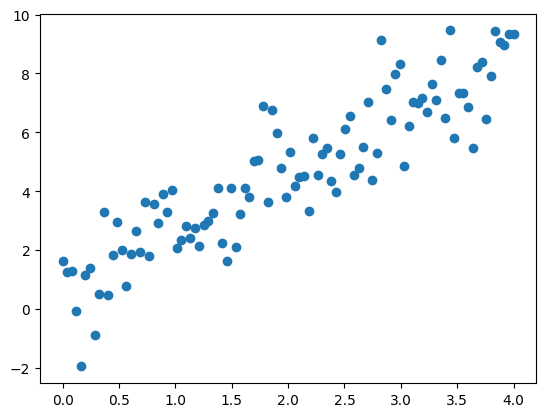

In [9]:
plt.scatter(x, y)

In [10]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)

    def __call__(self, x):
        return self.weight * x + self.bias


In [11]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [13]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)

    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [15]:
model = Model()
epochs = 100
learning_rate = 0.15
for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Echoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Echoch: 0, loss: 731.782958984375
Echoch: 1, loss: 519.87646484375
Echoch: 2, loss: 369.62890625
Echoch: 3, loss: 263.073974609375
Echoch: 4, loss: 187.48382568359375
Echoch: 5, loss: 133.84097290039062
Echoch: 6, loss: 95.75656127929688
Echoch: 7, loss: 68.7035903930664
Echoch: 8, loss: 49.474205017089844
Echoch: 9, loss: 35.794952392578125
Echoch: 10, loss: 26.054441452026367
Echoch: 11, loss: 19.110349655151367
Echoch: 12, loss: 14.152730941772461
Echoch: 13, loss: 10.607152938842773
Echoch: 14, loss: 8.066109657287598
Echoch: 15, loss: 6.240391731262207
Echoch: 16, loss: 4.924665927886963
Echoch: 17, loss: 3.9730682373046875
Echoch: 18, loss: 3.2819108963012695
Echoch: 19, loss: 2.7774264812469482
Echoch: 20, loss: 2.407080888748169
Echoch: 21, loss: 2.1334197521209717
Echoch: 22, loss: 1.9296983480453491
Echoch: 23, loss: 1.776785135269165
Echoch: 24, loss: 1.6609680652618408
Echoch: 25, loss: 1.5723907947540283
Echoch: 26, loss: 1.50394868850708
Echoch: 27, loss: 1.45050108432769

In [16]:
print(model.weight.numpy())
print(model.bias.numpy())

1.9770948
0.6882468


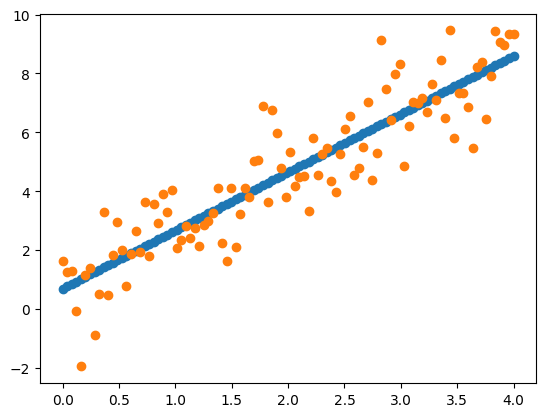

In [21]:
new_x = np.linspace(0, 4, 100)
new_y = model.weight.numpy() * x + model.bias.numpy()
plt.scatter(new_x, new_y)
plt.scatter(x, y)